In [12]:
from utils import *

In [15]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

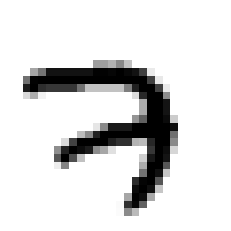

In [16]:
show_image(X_train[0])

In [46]:
train_set = tf.data.Dataset.from_tensor_slices((X_train[...,None], y_train)).shuffle(buffer_size=1000).batch(128).prefetch(1)
valid_set = tf.data.Dataset.from_tensor_slices((X_valid[...,None], y_valid)).batch(128)
test_set = tf.data.Dataset.from_tensor_slices((X_test[...,None], y_test)).batch(128)

In [47]:
X_valid[...,None].shape

(5000, 28, 28, 1)

In [48]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 5, activation="relu", input_shape=[28,28,1]),
    keras.layers.MaxPool2D(strides=2),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(64, 3, activation="relu"),
    keras.layers.MaxPool2D(strides=2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")

])

In [49]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="nadam", metrics=["accuracy"]
)

In [51]:
model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
430/430 [==============================] - 4s 10ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0338 - val_accuracy: 0.9912
Epoch 2/5
430/430 [==============================] - 4s 9ms/step - loss: 0.0464 - accuracy: 0.9853 - val_loss: 0.0351 - val_accuracy: 0.9904
Epoch 3/5
430/430 [==============================] - 4s 9ms/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 0.0337 - val_accuracy: 0.9902
Epoch 4/5
430/430 [==============================] - 4s 9ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0308 - val_accuracy: 0.9920
Epoch 5/5
430/430 [==============================] - 4s 9ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0299 - val_accuracy: 0.9924


In [52]:
model.evaluate(test_set)

79/79 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.9926


[0.023104816675186157, 0.9926000237464905]

In [ ]:
9888